<b><h1> Decision Tree Classifier – Bank Marketing</h1></b>

>Build a Decision Tree Classifier to predict whether a customer will purchase a product or service based on demographic and behavioral data.

    
- Dataset Source: UCI Machine Learning Repository
    

### About the Dataset

The dataset pertains to direct marketing campaigns conducted via telephone by a Portuguese banking institution. The primary objective is to predict whether a client will subscribe to a term deposit product.

#### Key Features

| Column         | Description                                                   |
|----------------|---------------------------------------------------------------|
| age            | Age of client                                                 |
| job            | Type of job                                                   |
| marital        | Marital status                                                |
| education      | Education level                                               |
| default        | Credit in default?                                            |
| housing        | Housing loan?                                                 |
| loan           | Personal loan?                                                |
| contact        | Contact communication type                                    |
| month          | Last contact month                                            |
| day_of_week    | Last contact day                                              |
| duration       | Last contact duration (in seconds)                            |
| campaign       | Number of contacts during this campaign                       |
| pdays          | Days since last contact from previous campaign                |
| previous       | Number of contacts before this campaign                       |
| poutcome       | Outcome of previous campaign                                  |
| y              | Target: Term deposit subscription (yes/no)                    |

<b><h3>Import Libraries</h3></b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

<b><h3>Load Data</h3></b>

In [6]:
data = pd.read_csv("bank.csv",sep = ';')
data.rename(columns={'y':'subscribed_deposit'},inplace=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b><h3>Dataset Summary and CLeaning </h3></b>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [9]:
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [10]:
#remove duplicates
print("Duplicates before: ",data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Duplicates after: ",data.duplicated().sum())

Duplicates before:  12
Duplicates after:  0


<h3>Univariate Analysis</h3>

- Seprate numeric and categorical columns

In [13]:
data_obj = data.select_dtypes(include='object').columns
data_num = data.select_dtypes(exclude='object').columns

- Numeric Histograms

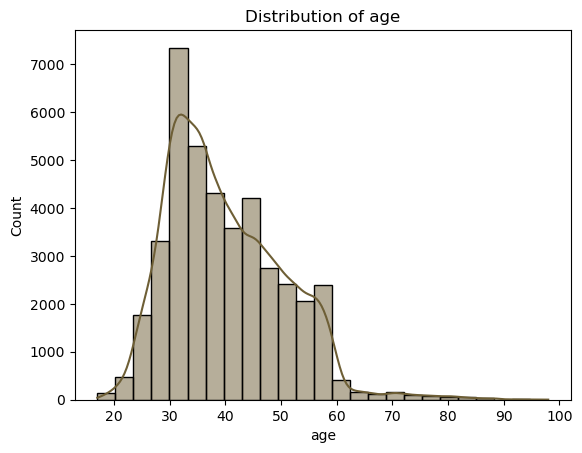

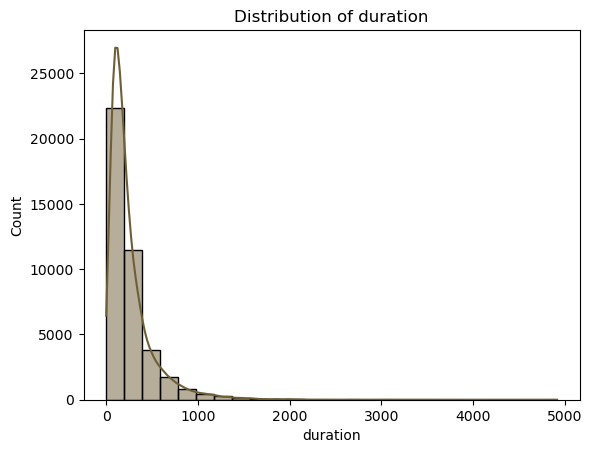

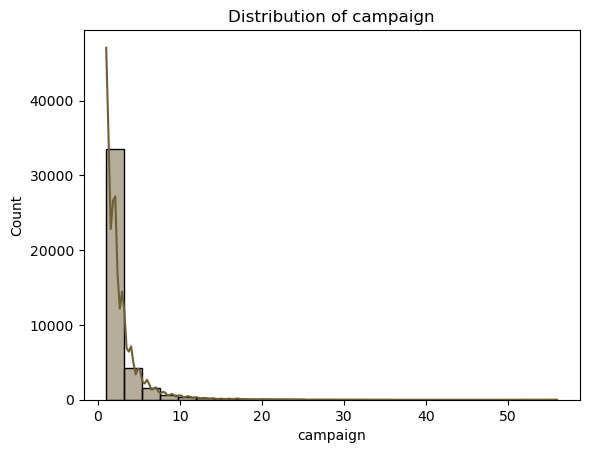

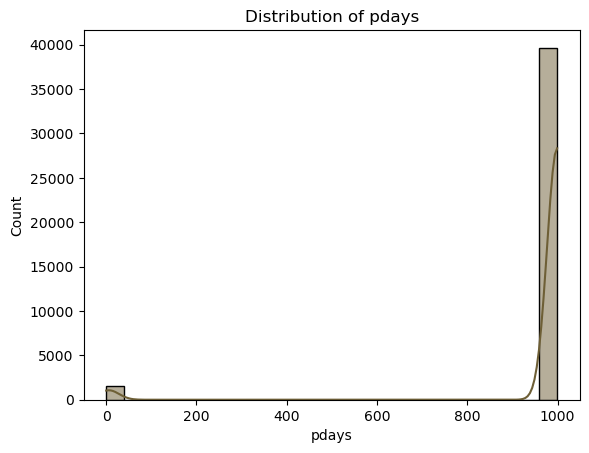

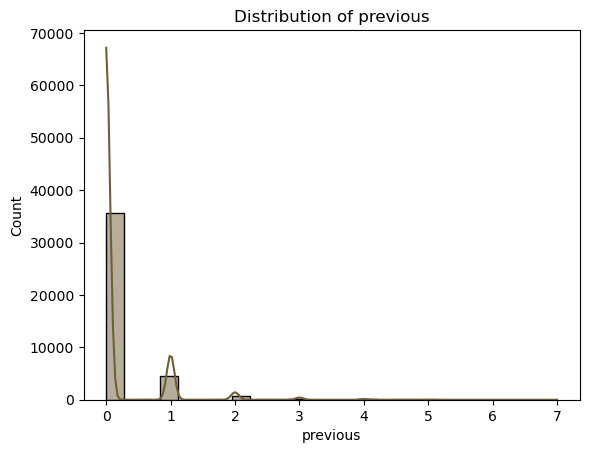

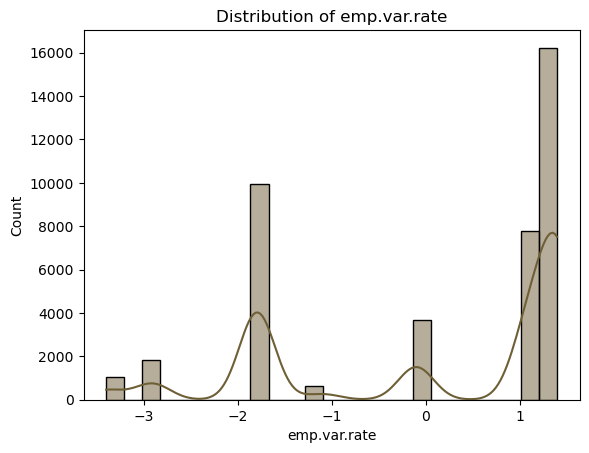

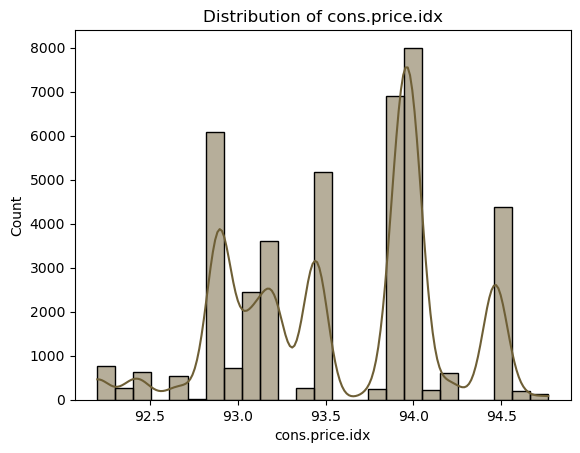

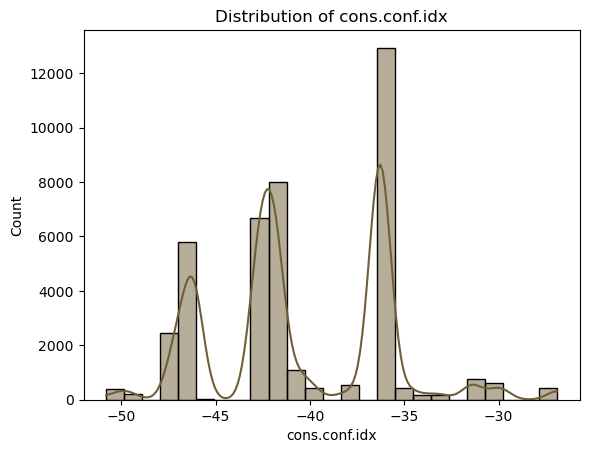

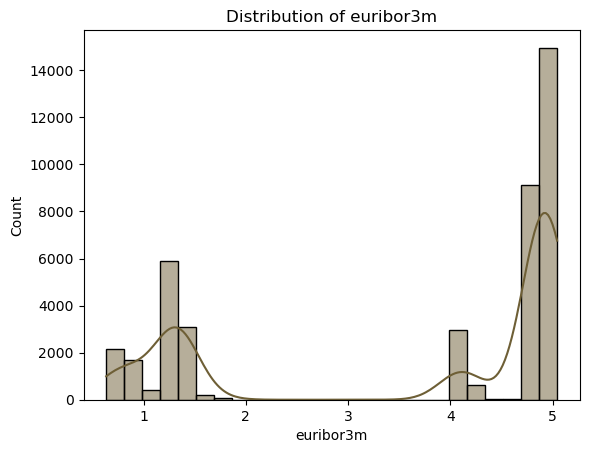

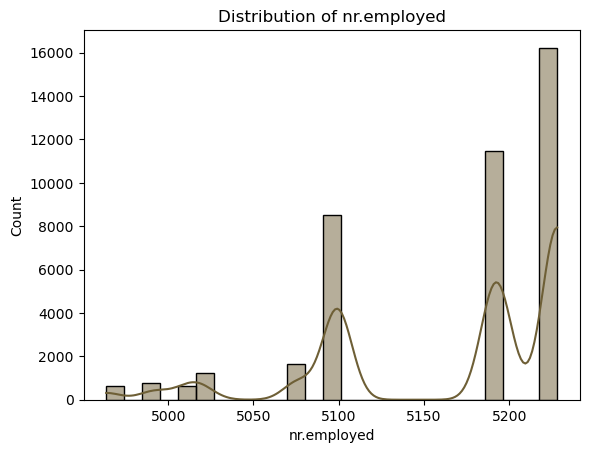

In [15]:
for feature in data_num:
    sns.histplot(x=feature,data=data,bins=25,kde=True,color='#6e5f36')
    plt.title(f'Distribution of {feature}')
    plt.show()

- Categorical bar plots

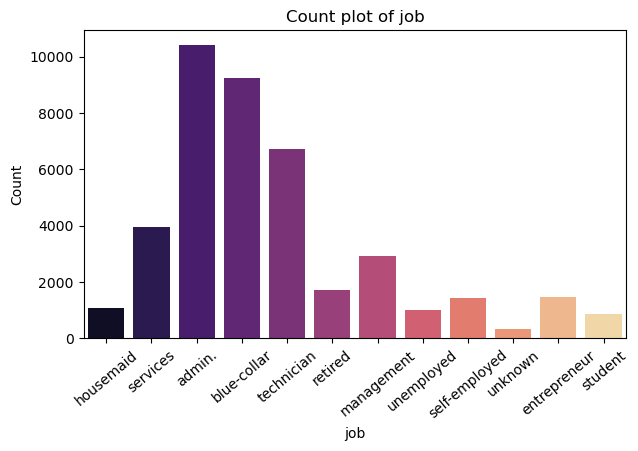

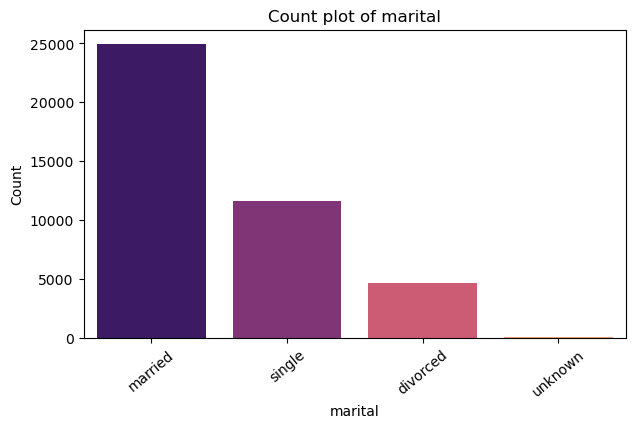

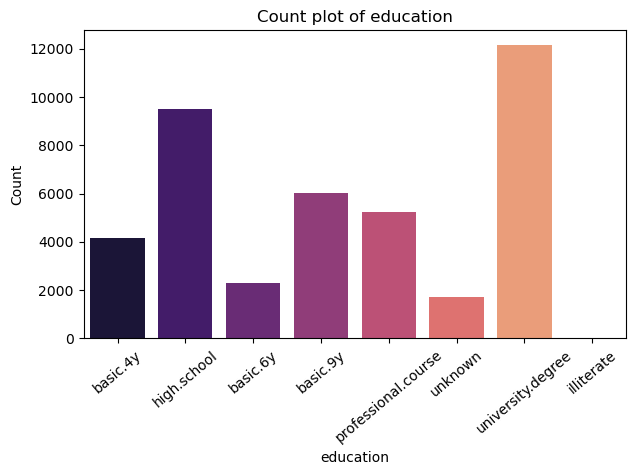

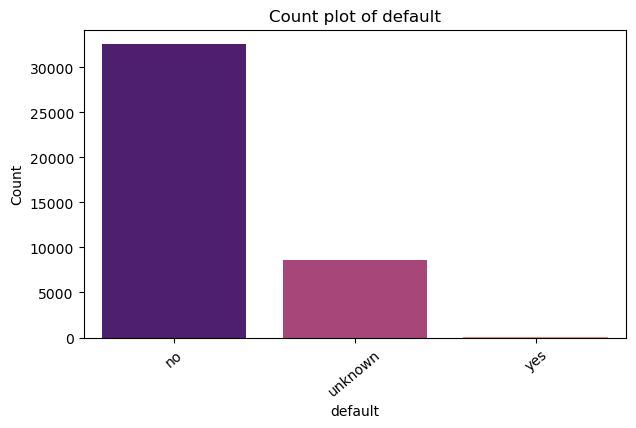

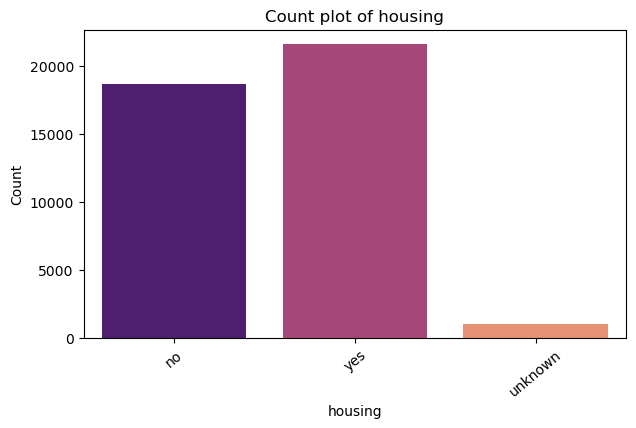

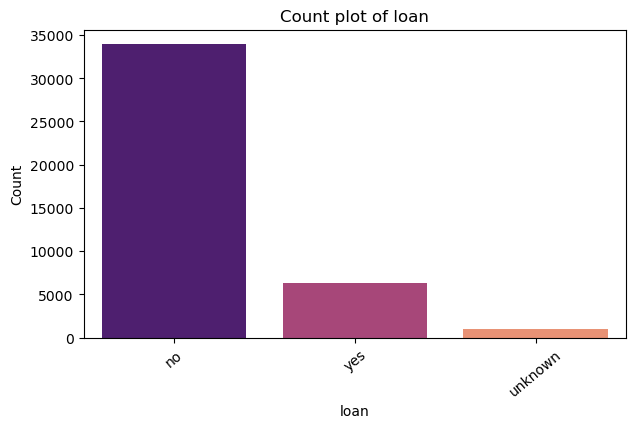

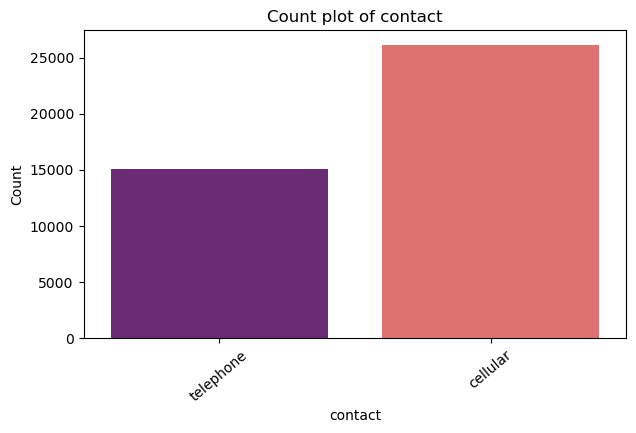

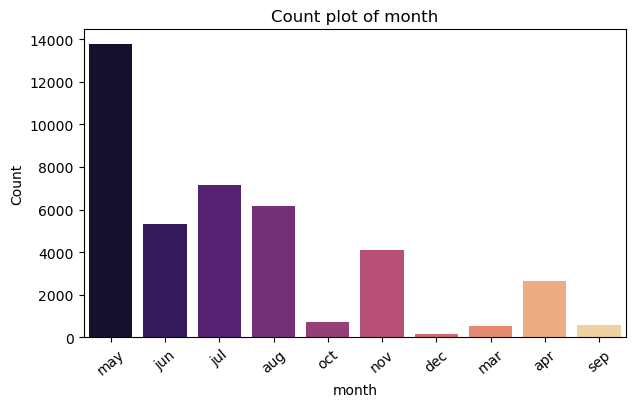

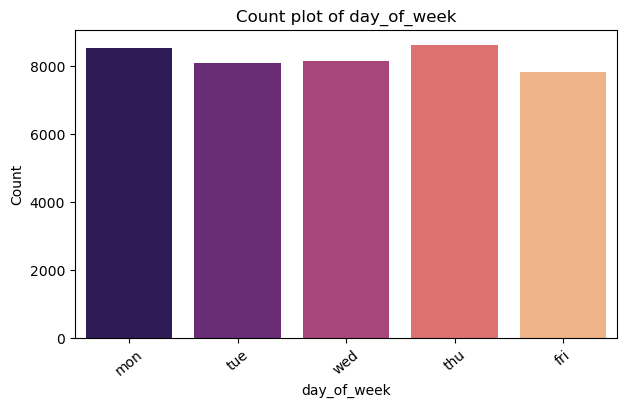

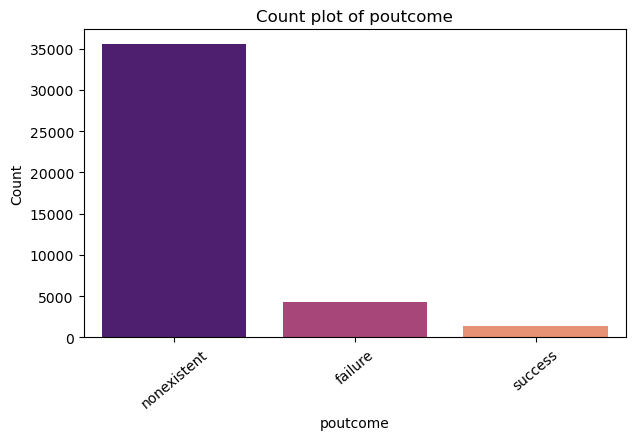

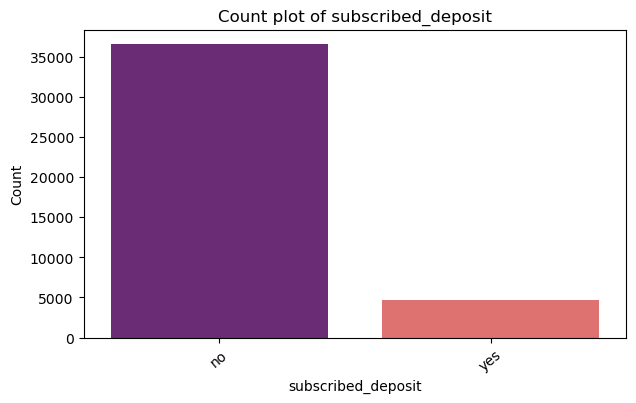

In [17]:
for feature in data_obj:
    plt.figure(figsize=(7,4))
    sns.countplot(x=feature, data=data,palette='magma')
    plt.title(f'Count plot of {feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=40)
    plt.show()

### Correlation Analysis

Correlation matrix

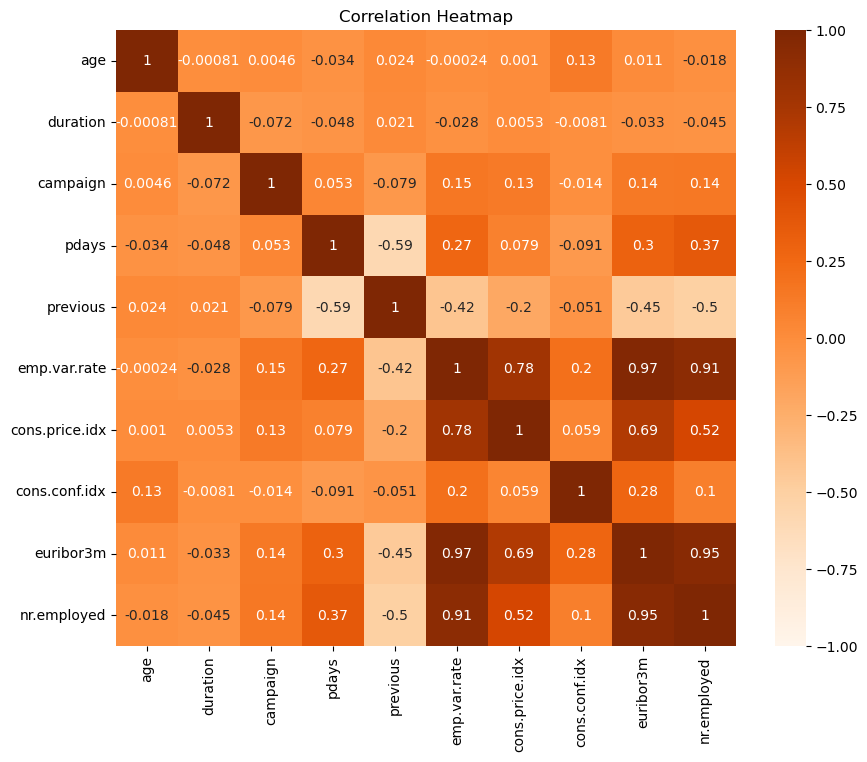

In [20]:
numerical_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='Oranges', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<b><h3>Label Encoding and Preprocessing</h3></b>

In [22]:
data['subscribed_deposit'] = data['subscribed_deposit'].map({'yes': 1, 'no': 0})
data_encoded = pd.get_dummies(data.drop('subscribed_deposit', axis=1), drop_first=True)

In [23]:
X = data_encoded
y = data['subscribed_deposit']

<b><h3>Train-Test-Split</h3></b>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

<h3>Train Decission Tree Classifier</h3>

In [27]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [28]:
#predict
y_pred = dt_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9143527887962438


In [29]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10572   389]
 [  669   723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10961
           1       0.65      0.52      0.58      1392

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353



<h3>Visualization</h3>

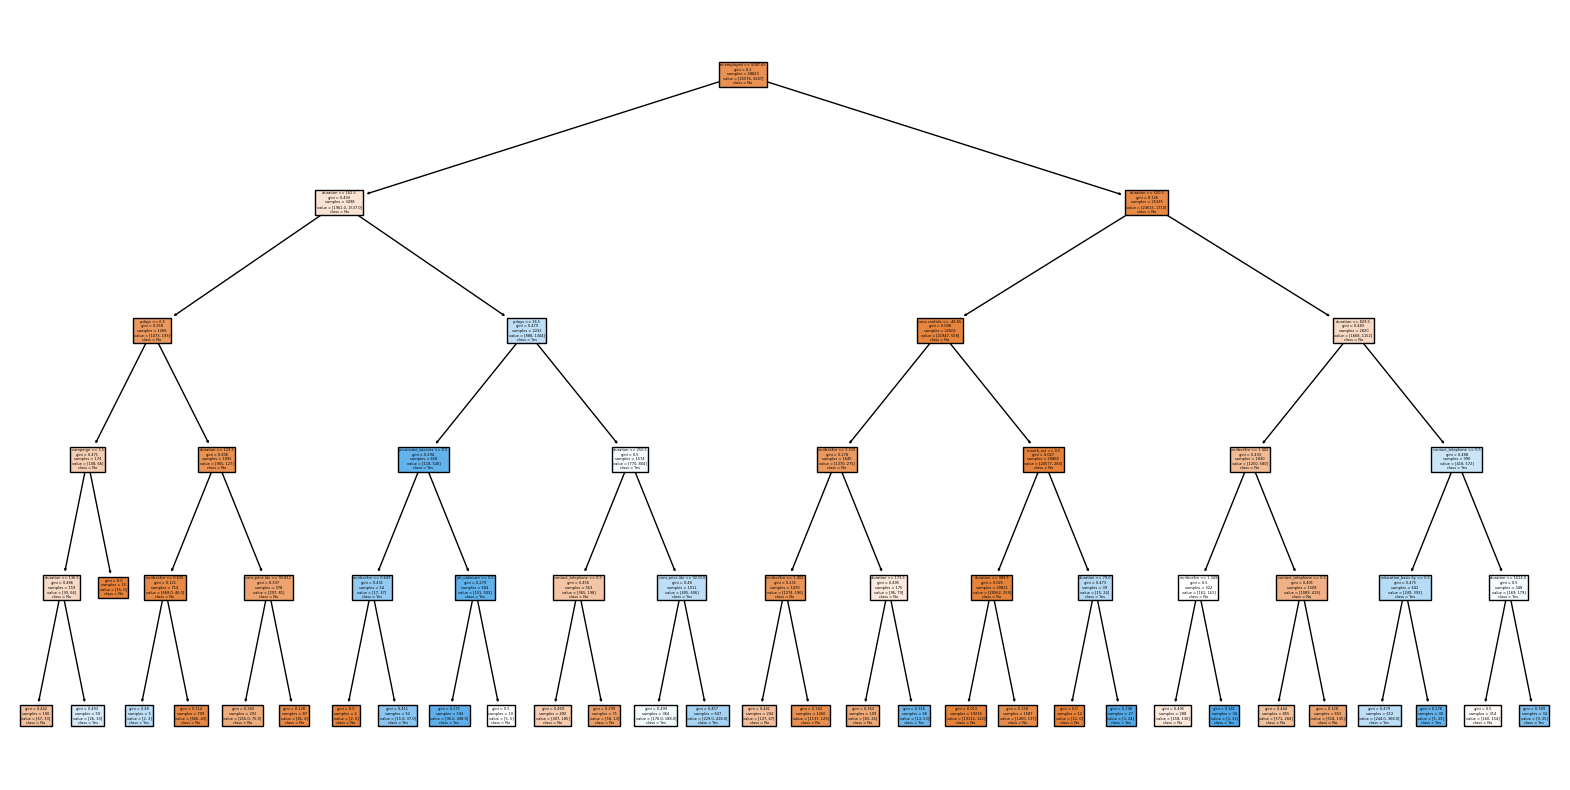

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

## ✅ Final Conclusion

- The model performs well with both Gini and Entropy criteria.
- Training Accuracy (Gini): 93.6% | Testing Accuracy (Gini): 93.3%
- Training Accuracy (Entropy): 93.6% | Testing Accuracy (Entropy): 93.2%

### 🔍 Observations:
- Gini has slightly better recall.
- Entropy produces fewer false positives.